#CNN Model in TENSORFLOW

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/DL_assignment_Sagnik
Trainset: 60000
Testset: 10000
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   

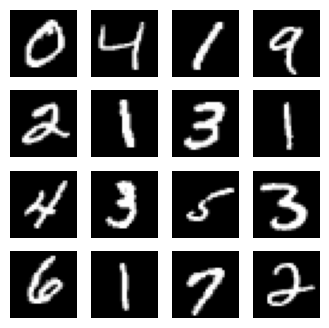

In [ ]:
#importing the data loader func made in tensorflow
from google.colab import drive
drive.mount('/content/drive')
%cd /content/drive/MyDrive/Sagnik_B21320_DL_Assgn

%run 2a(TF).ipynb

In [ ]:
# reshaping dataset to have a single channel
train_images = train_images.reshape((train_images.shape[0], 28, 28, 1))
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1))

## Building the model

In [ ]:
#relevant libraries
import numpyas np
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense

In [ ]:
#defining the cnn model
def build_model(hp):
    setup=keras.models.Sequential([
        Conv2D(
        filters=hp.Int("conv_1_filter",min_value=32, max_value=128,step=16),
        kernel_size=hp.Choice("conv_1_kernel",values=[3,5]),
        activation='relu',
        input_shape=(28,28,1)),

        MaxPooling2D(pool_size= (2,2)),

        Conv2D(
            filters=hp.Int("conv_2_filter",min_value=32, max_value=64,step=16),
            kernel_size=hp.Choice("conv_2_kernel",values=[3,5]),
            activation='relu'),

        MaxPooling2D(pool_size= (2,2)),

        Flatten(),

        Dense(units=hp.Int('dense_1_units',min_value=32,max_value=128,step=16)),

        Dense(10,activation='softmax')])

    setup.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning rate', values=[1e-2,1e-3])),loss='sparse_categorical_crossentropy',metrics=['accuracy'])

    return setup

The above model has a basic CNN architecture, however a separate code is also written with VGG16 based model. (Both having comparable accuracies)

In [ ]:
#installation of kerastuner for hyperparameter tuning
!pip install keras-tuner

In [ ]:
#tuning the hyperparameters
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

tuner_search=RandomSearch(build_model, objective='val_accuracy',max_trials=5,directory='output',project_name='MNIST',overwrite=True, tune_batch_size=True)
tuner_search.search(train_images,train_labels,epochs=2,validation_split=0.1)                            #number of epochs can be increased to inc accuracy

#best model as per hyperparam optimization
best_model = tuner_search.get_best_models(num_models=1)[0]
best_model.summary()

Trial 5 Complete [00h 02m 12s]
val_accuracy: 0.9894999861717224

Best val_accuracy So Far: 0.9894999861717224
Total elapsed time: 00h 16m 57s
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 48)        1248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 48)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 10, 10, 32)        13856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 5, 5, 32)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 800)      

313/313 [==============================] - 3s 9ms/step


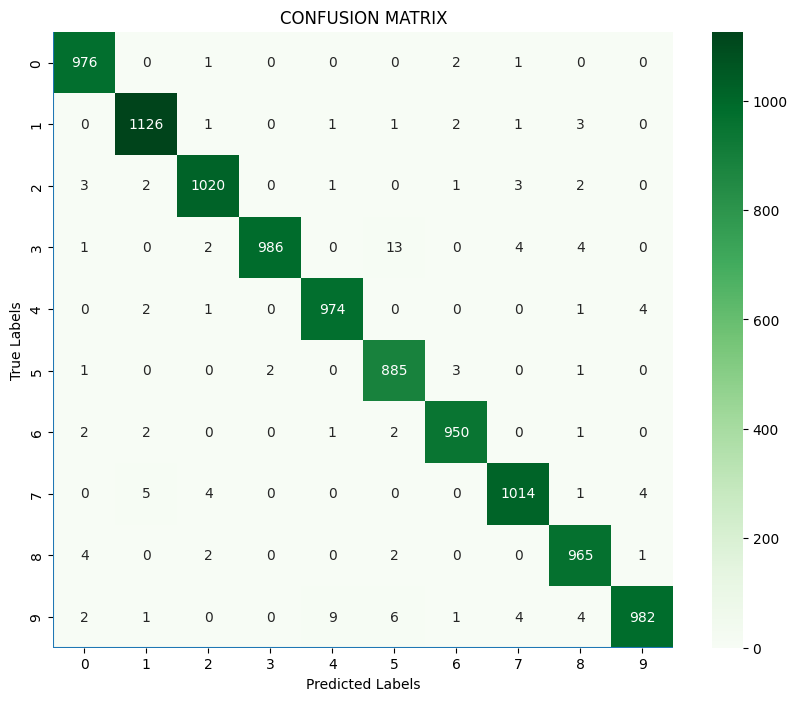

In [ ]:
#visualizing the summary
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#predictions
predictions = best_model.predict(test_images)
predicted_labels = np.argmax(predictions, axis=1)

#conf matrix
cm = confusion_matrix(test_labels, predicted_labels)

#plotting
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d',cmap='Greens', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('CONFUSION MATRIX')
plt.axhline(10)
plt.axvline(0)
plt.show()